In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

Using TensorFlow backend.


In [2]:
train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')
print(train_dataset.shape)
print(test_dataset.shape)

(42000, 785)
(28000, 784)


In [3]:
y_train = train_dataset.iloc[:-4200,0].to_numpy()
X_train = train_dataset.iloc[:-4200,1:].to_numpy()

y_val = train_dataset.iloc[-4200:,0].to_numpy()
X_val = train_dataset.iloc[-4200:,1:].to_numpy()

X_test = test_dataset.to_numpy()

In [4]:
X_train = X_train / 256
X_train = X_train.reshape((-1, 28, 28, 1))

X_val = X_val / 256
X_val = X_val.reshape((-1, 28, 28, 1))

X_test = X_test / 256
X_test = X_test.reshape((-1, 28, 28, 1))

y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)

In [5]:
model = Sequential()

# Conv1
model.add(Conv2D(32, (5,5), input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2)))

# Conv2
model.add(Conv2D(32, (5,5)))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(100, activation='sigmoid'))
# model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          25632     
_________________________________________________________________
activation_2 (Activation)    (None, 8, 8, 32)          0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

In [6]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
hist = model.fit(X_train, y_train, shuffle=True,batch_size=128, epochs=10, validation_data=(X_val, y_val))

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 30s 805us/step - loss: 0.4917 - accuracy: 0.8735 - val_loss: 0.1431 - val_accuracy: 0.9612
Epoch 2/10
37800/37800 [==============================] - 26s 681us/step - loss: 0.1063 - accuracy: 0.9724 - val_loss: 0.0841 - val_accuracy: 0.9757
Epoch 3/10
37800/37800 [==============================] - 27s 719us/step - loss: 0.0708 - accuracy: 0.9806 - val_loss: 0.0649 - val_accuracy: 0.9805
Epoch 4/10
37800/37800 [==============================] - 27s 705us/step - loss: 0.0526 - accuracy: 0.9853 - val_loss: 0.0533 - val_accuracy: 0.9838
Epoch 5/10
37800/37800 [==============================] - 29s 763us/step - loss: 0.0414 - accuracy: 0.9888 - val_loss: 0.0446 - val_accuracy: 0.9862
Epoch 6/10
37800/37800 [==============================] - 28s 743us/step - loss: 0.0331 - accuracy: 0.9911 - val_loss: 0.0422 - val_accuracy: 0.9869
Epoch 7/10
37800/37800 [==============================] -

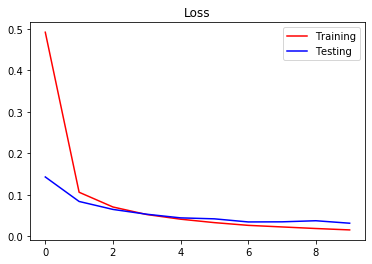

In [8]:
plt.figure(0)
plt.title("Loss")
plt.plot(hist.history['loss'], 'r', label='Training')
plt.plot(hist.history['val_loss'], 'b', label='Testing')
plt.legend()
plt.show()

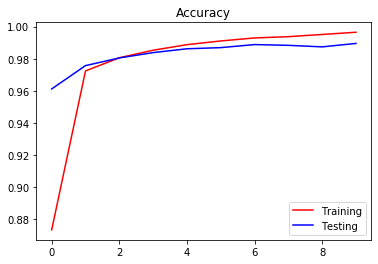

In [9]:
plt.figure(1)
plt.title("Accuracy")
plt.plot(hist.history['accuracy'], 'r', label='Training')
plt.plot(hist.history['val_accuracy'], 'b', label='Testing')
plt.legend()
plt.show()

In [10]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions , axis=1)

In [11]:
submission = pd.read_csv('sample_submission.csv')
submission['Label'] = predictions
submission.to_csv('cnn_submission.csv', index=False)

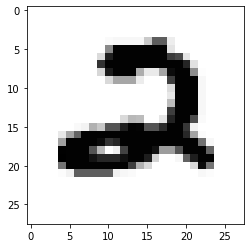

In [12]:
plt.imshow(X_test[0][:,:,0],cmap='Greys')

In [14]:
predictions[0]

2